# Исследование рынка продаж игр 

Цель: выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


В ходе исследования нужно проверить 2 гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Описание данных:
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Открываем файл и изучаем общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import ttest_ind


In [2]:
data = pd.read_csv('/datasets/games.csv', sep=',')
pd.set_option('display.max_columns', None)

In [3]:
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


#### Вывод о сырых данных

**Мы видим датафрейм из 11 колонок и 16715 строк. У всех колонок нарушен стиль наименований, нужно привести к нижнему регистру, также у колонок Year_of_Release и User_Score нужно поменять тип данных на int и float. Пропусков не очень много, но они есть, дальше будем смотреть что с ними делать. Вызвав метод describe, не видим каких-то аномалий.**

### Предобработка данных

In [6]:
#Преводим названия колонок к нижнему регистру
data.columns = data.columns.str.lower()
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [7]:
#Меняем типы данных в столбцах
data['year_of_release'] = np.floor(pd.to_numeric(data['year_of_release'], errors='coerce')).astype('Int64')

In [8]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце со зрительским рейтингом, помимо чисел мы видим аббревиатуру tbd.
TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Акроним служит для отметки неясностей или пропусков, которые надо заполнить, в информации требований.

In [9]:
tbd = data.loc[data['user_score'] == 'tbd', ['year_of_release', 'user_score']]
tbd

,year_of_release,user_score
119,2010,tbd
301,2005,tbd
520,2011,tbd
645,2010,tbd
657,<NA>,tbd
...,...,...
16695,2001,tbd
16697,2003,tbd
16698,2008,tbd
16704,2008,tbd


Мы видим что фильмы 2000-х годов еще "ожидают оценки", поэтому мы просто заменим тип данных в этом столбце и заменим пропуски заглушкой.

In [10]:
data['user_score'] = data['user_score'].replace('tbd', 'N/A')
data['user_score'].fillna('N/A', inplace=True)

# Преобразование столбцов в числовой тип данных
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

In [11]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [12]:
display(data['year_of_release'].unique())
display(data['genre'].unique())
display(data['critic_score'].unique())
display(data['user_score'].unique())
display(data['rating'].unique())

<IntegerArray>
[2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010, 2013, 2004,
 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014, 1992, 1997, 1993, 1994,
 1982, 2016, 2003, 1986, 2000, <NA>, 1995, 1991, 1981, 1987, 1980, 1983]
Length: 38, dtype: Int64

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Посмотрм на обозначения рейтинга:
- 'E' Подходит для всех возрастных категорий.
- 'M' Подходит для лиц старше 17 лет.
- 'T' Подходит для лиц старше 13 лет. 
- 'E10+' Подходит для лиц старше 10 лет.
- 'K-A' Для всех от 10 лет и старше
- 'AO' Подходит для взрослых старше 18 лет.
- 'EC' Для детей младшего возраста. Подходит для детей от 3 лет
- 'RP' Категория ещё не присвоена.

Мы видим, что 'E10+', 'K-A' имеют одинковые значения, значит можем объединить их.

In [13]:
data['rating'] = data['rating'].replace('K-A', 'E10+')

**ПРОПУСКИ В ДАННЫХ**

- Столбец 'name' это название игры, заменить пропуски нечем, **удаляем**. Нам не нужны данные об игре без названия.

- Я думаю будет разумно, заменить пропуски в столбцах 'critic_score', 'user_score' **заглушками**. 

- В столбце 'year_of_release' нечем заменить пропуски, мы их **пропускаем**.

- Столбец 'genre' это жанр игры, заменить пропуски нечем, **удаляем**. Пропуска всего 2, они ни на что не повлияют.

- В столбце 'rating' пропуски заменим **заглушками**

In [14]:
data.dropna(subset=['name', 'genre'], inplace=True)

In [15]:
data['critic_score'].fillna('N/A', inplace=True)
data['rating'].fillna('N/A', inplace=True)
# Преобразование столбцов в числовой тип данных
data['critic_score'] = pd.to_numeric(data['critic_score'], errors='coerce')

Пропуски в столбцах с годом выпуска, оценками критиков, оценками зрителей и возрастным рейтингом могут возникнуть по разным причинам, включая:

- В исходных источниках данных могут отсутствовать значения для этих столбцов. Например, если данные собирались из различных источников или были внесены вручную, то не всегда есть полная информация о годе выпуска фильма, оценках критиков и зрителей, или возрастном рейтинге.

- В процессе сбора данных могли возникнуть ошибки или пропуски, особенно если использовался автоматический сбор данных или обработка большого объема информации.


**Посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец.**

In [16]:
data['all_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [17]:
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,N/A,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,N/A,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,N/A,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,N/A,28.31


In [18]:
data.duplicated().sum()

0

#### Вывод
В части по предобработке данных мы:
- Привели называния колонок к нижнему регистру
- Изменили тип данных у колонки year_of_release с float на int, поскольку год это целое число и у колонки user_score с object на float, поскольку рейтинг это число, а не строка и может быть не целым.
- В некоторых столбцах оставили пропуски, где-то удалили, а где-то заменили заглушками. 
- Добавили новый столбец all_sales с данными обо всех продажах. 
- Проверили датафрейм на дубликаты - их не оказалось.
_____________
С предобработкой данных мы закончили, можем приступать к анализу.

### Исследовательский анализ данных

**В этом разделе мы посмотрим на продажи по платформам**

#### Посмотрим сколько игр выпускалось в разные годы

In [19]:
games_years = data.pivot_table(index = 'year_of_release', values = 'name', aggfunc = "count")
games_years = games_years.sort_values('name', ascending = False)

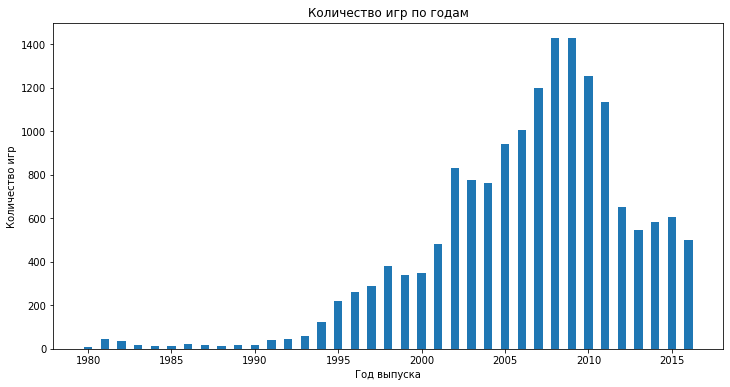

In [20]:
plt.figure(figsize=(12,6));
plt.bar(games_years.index, games_years['name'], width=0.5)
plt.title('Количество игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.show()

**По диаграмме мы видим, что больше всего игр выпускалось на период с 2005 по 2010 годы**

In [21]:
games_years.head(5).reset_index()

,year_of_release,name
0,2008,1427
1,2009,1426
2,2010,1255
3,2007,1197
4,2011,1136


##### Вывод
**Если расммотреть детальнее, получаем 5 годов в которые вышло больше всего игр:**
1. 	2008 - 1427 игр
2.	2009 - 1426 игр
3.	2010 - 1255 игр
4.	2007 - 1197 игр
5.	2011 - 1136 игр

#### Посмотрим как менялись продажи по платформам. 

Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. 
За какой характерный срок появляются новые и исчезают старые платформы?

In [22]:
sales_platform = data.pivot_table(index = 'platform' , values = 'all_sales', aggfunc = "sum")\
.reset_index()\
.sort_values(by='all_sales',ascending = False)

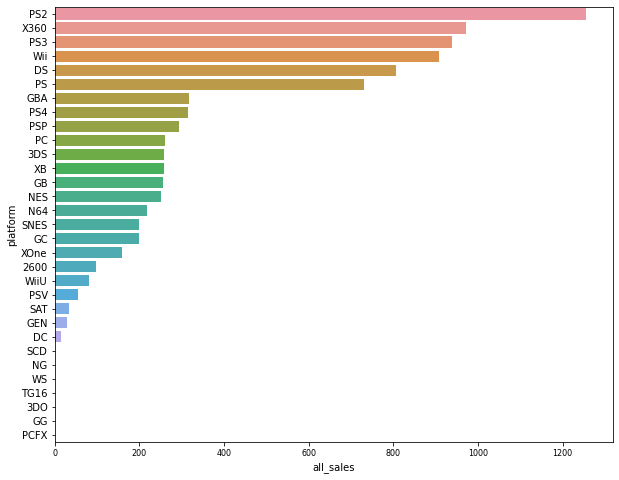

In [23]:
fig,ax = plt.subplots(figsize=(10,8))
plt.xticks(fontsize= 8)
sns.barplot(x=sales_platform['all_sales'], y=sales_platform['platform'], orient='h');

На графике наглядно показано как распределяются продажи по платформам, для дальнейшей работы выберем только 5 лучших.

In [24]:
top_platform = sales_platform.head(5)
top_platform

,platform,all_sales
16,PS2,1255.77
28,X360,971.42
17,PS3,939.65
26,Wii,907.51
4,DS,806.12


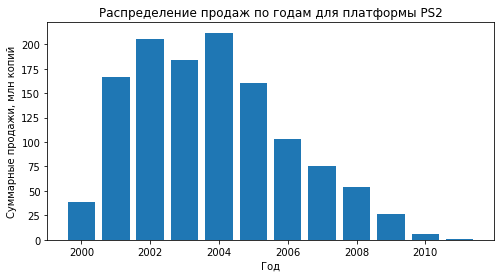

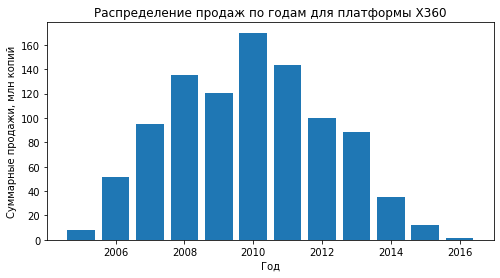

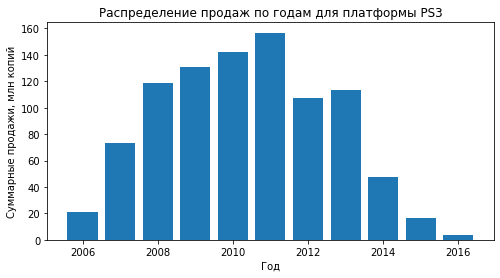

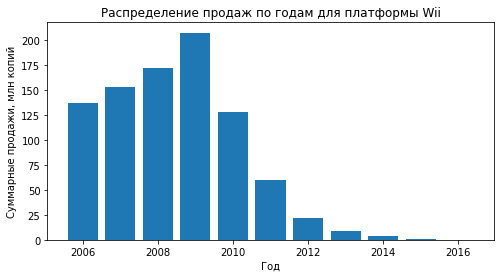

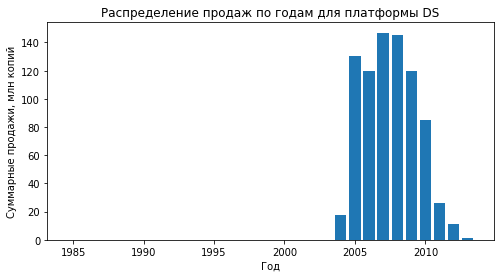

In [25]:
for platform in top_platform['platform']:
    # Фильтруем данные по текущей платформе
    platform_data = data[data['platform'] == platform]
    # Считаем суммарные продажи по годам
    sales_by_year = platform_data.groupby('year_of_release')['all_sales'].sum()
    # Построение столбчатой диаграммы распределения по годам
    plt.figure(figsize=(8, 4))
    plt.bar(sales_by_year.index, sales_by_year.values)
    plt.title(f'Распределение продаж по годам для платформы {platform}')
    plt.xlabel('Год')
    plt.ylabel('Суммарные продажи, млн копий')
    plt.show()

Что мы видим на графиках:
1. Больше всего игр для платформы PS2 продавалось в период с 2001 по 2005 год
2. Больше всего игр для платформы Х360 продавалось в период с 2007 по 2013 год
3. Больше всего игр для платформы PS3 продавалось в период с 2007 по 2013 год
4. Больше всего игр для платформы Wii продавалось в период с 2006 по 2011 год
5. Больше всего игр для платформы DS продавалось в период с 2005 по 2010 год

##### Вывод
Самые популярные по прадажам платформы это:
- PS2(PlayStation2) - 1255.77 млн копий продано, 
- X360(XBOX 360) - 971.42 млн копий продано, 
- PS3(PlayStation3) - 939.65 млн копий продано, 
- Wii(Nintendo Wii) - 907.51 млн копий продано, 
- DS(Nintendo DS) - 806.12 млн копий продано.
_______________
Также мы видим, что срок период "живучести" платформы приблизительно 5 лет.

#### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

Думаю логично будет взять период в 5 лет. с 2011 по 2016 год.

In [26]:
#создаем датафрейм, в котором будут только те игры, что вышли после 2011 года
period_filter = data['year_of_release'] >= 2011
sort_years = data[period_filter]

In [27]:
#вычисляем суммарные продажи по платформам
platform_sales = sort_years.groupby('platform')['all_sales'].sum()
platform_sales = platform_sales.sort_values(ascending=False).head(5)

In [28]:
#вычисляем средние продажи по платформам
platform_sales_mean = sort_years.groupby('platform')['all_sales'].mean()
platform_sales_mean = platform_sales_mean.sort_values(ascending=False).head(5)

In [29]:
#вычисляем общее количество выпущенных игр
platform_sales_count = sort_years.groupby('platform')['name'].count()
platform_sales_count = platform_sales_count.sort_values(ascending=False).head(5)

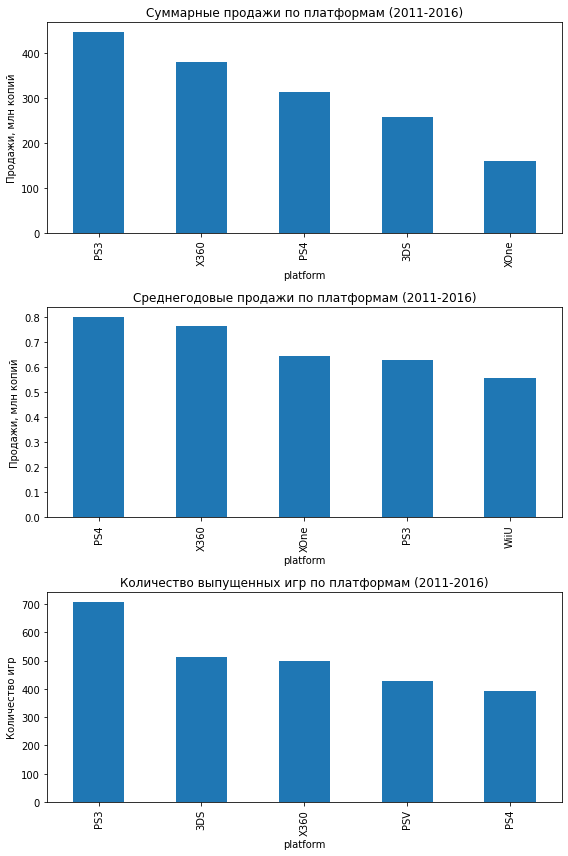

In [30]:
# Визуализируем результаты
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 12))
platform_sales.plot(kind='bar', ax=axes[0])
axes[0].set_title('Суммарные продажи по платформам (2011-2016)')
axes[0].set_ylabel('Продажи, млн копий')

platform_sales_mean.plot(kind='bar', ax=axes[1])
axes[1].set_title('Среднегодовые продажи по платформам (2011-2016)')
axes[1].set_ylabel('Продажи, млн копий')

platform_sales_count.plot(kind='bar', ax=axes[2])
axes[2].set_title('Количество выпущенных игр по платформам (2011-2016)')
axes[2].set_ylabel('Количество игр')
plt.tight_layout()
plt.show()

##### Вывод
Из анализа данных о топ-5 платформ по количеству выпущенных игр (PS3, 3DS, X360, PSV, PS4) можно сделать следующие выводы:

- PS3 и X360 находятся в топ-5 платформ и по количеству выпущенных игр, и по суммарным продажам, что может указывать на их популярность и коммерческий успех на рынке игровых платформ.
- 3DS (Nintendo 3DS) также находится в топ-5 платформ по количеству выпущенных игр, но отсутствует в топ-5 по суммарным продажам, что может указывать на то, что игры на этой платформе выпускались в большом количестве, но имели относительно низкие продажи.
- PSV (PlayStation Vita) находится в топ-5 платформ по количеству выпущенных игр, но отсутствует в топ-5 по суммарным продажам, что может указывать на низкую коммерческую успешность этой платформы в отношении продаж игр.
- PS4 находится в топ-5 платформ и по количеству выпущенных игр, и по суммарным продажам, что может указывать на ее популярность и коммерческий успех на рынке игровых платформ.
_________
**Потенциально прибыльные платформы: PS3,X360,PS4**

#### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам

In [31]:
selected_platforms = ['PS3', 'PS4', 'X360']
selected_data = sort_years[sort_years['platform'].isin(selected_platforms)]
#sort_years - датафрейм отсортированный по годам, с 2011 по 2016

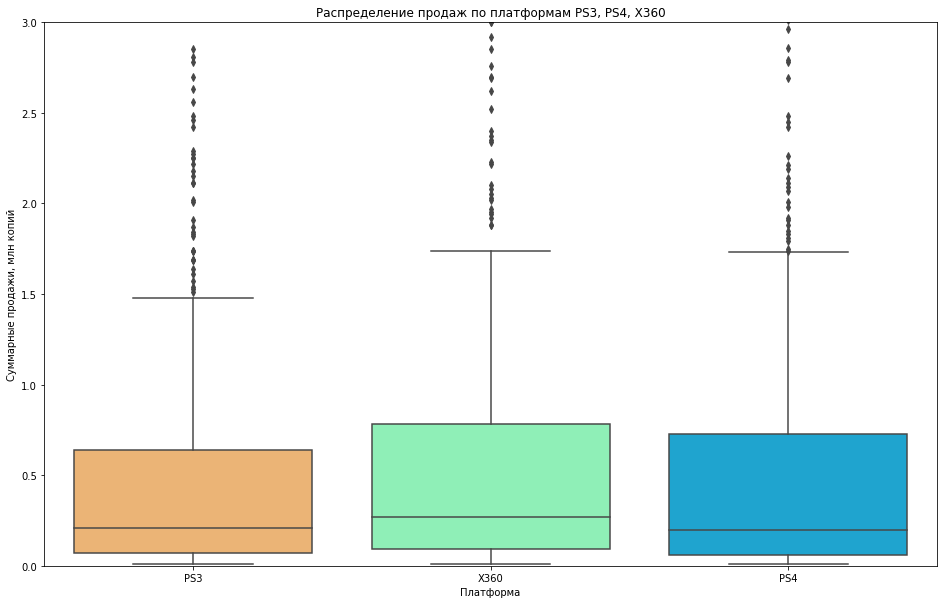

In [32]:
plt.figure(figsize=(16, 10))
sns.boxplot(x='platform', y='all_sales', data=selected_data, palette='rainbow_r')
plt.title('Распределение продаж по платформам PS3, PS4, X360')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи, млн копий')
plt.ylim(0,3)
plt.show()

##### Вывод
По графикам мы видим, что и медиана, и сам ящик, и "ус" у палтформы Х360 выше, чем у других платформ. Это может указывать на то, что игры на платформе Х360 были популярнее среди покупателей, и продажи на этой платформе были выше, чем на платформах РS4 и PS3.
___________
У РS4 и PS3 графики примерно одинаковые
________________________________
Выбросы есть у всех платформ

#### Влияние отзывов пользователей и критиков на продажи Х360

Надо построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами

In [33]:
top_platform = ['X360']
top_platf_data = sort_years[sort_years['platform'].isin(top_platform)]
#sort_years - датафрейм отсортированный по годам, с 2011 по 2016

In [34]:
top_platf_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
66,Halo 4,X360,2012,Shooter,6.65,2.28,0.04,0.74,87.0,7.0,M,9.71
...,...,...,...,...,...,...,...,...,...,...,...,...
16540,Bullet Soul: Tama Tamashii,X360,2011,Shooter,0.00,0.00,0.01,0.00,NaN,NaN,N/A,0.01
16576,DoDonPachi Daifukkatsu: Black Label,X360,2011,Shooter,0.00,0.00,0.01,0.00,NaN,NaN,N/A,0.01
16613,Dragon Ball Z for Kinect,X360,2012,Fighting,0.01,0.00,0.00,0.00,49.0,2.1,T,0.01
16647,Metal Gear Solid HD Edition,X360,2011,Action,0.00,0.00,0.01,0.00,NaN,NaN,M,0.01


In [35]:
top_platf_data.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,all_sales
year_of_release,1.000000,-0.052439,-0.040666,-0.210748,-0.049263,-0.006722,-0.213459,-0.051671
na_sales,-0.052439,1.000000,0.850696,0.569768,0.959724,0.374919,0.030382,0.980468
eu_sales,-0.040666,0.850696,1.000000,0.573675,0.954631,0.385802,0.048640,0.937267
jp_sales,-0.210748,0.569768,0.573675,1.000000,0.603274,0.326751,0.122042,0.598776
other_sales,-0.049263,0.959724,0.954631,0.603274,1.000000,0.390670,0.039601,0.993561
critic_score,-0.006722,0.374919,0.385802,0.326751,0.390670,1.000000,0.568386,0.391253
user_score,-0.213459,0.030382,0.048640,0.122042,0.039601,0.568386,1.000000,0.038918
all_sales,-0.051671,0.980468,0.937267,0.598776,0.993561,0.391253,0.038918,1.000000


Корреляция: 0.39


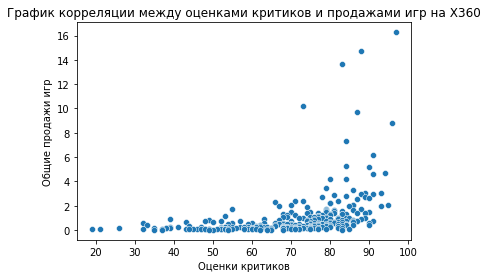

In [36]:
sns.scatterplot(x=top_platf_data['critic_score'], y=top_platf_data['all_sales']);
critic_corr = top_platf_data['critic_score'].corr(top_platf_data['all_sales'])
plt.title('График корреляции между оценками критиков и продажами игр на Х360')
plt.xlabel('Оценки критиков')
plt.ylabel('Общие продажи игр')
print(f'Корреляция: {critic_corr:.2f}')

Корреляция: 0.04


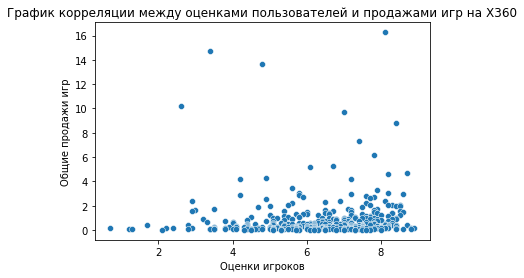

In [37]:
sns.scatterplot(x=top_platf_data['user_score'], y=top_platf_data['all_sales']);
user_corr = top_platf_data['user_score'].corr(top_platf_data['all_sales'])
plt.title('График корреляции между оценками пользователей и продажами игр на Х360')
plt.xlabel('Оценки игроков')
plt.ylabel('Общие продажи игр')
print(f'Корреляция: {user_corr:.2f}')

**ВЫВОД**
__________________
Корреляция между оценкми критиков и продажами игр на Х360: 0.35, это может указывать на наличие некоторой положительной связи между оценками критиков и объемом продаж игр. Но коэффициент корреляции 0.35 не очень сильный, следовательно, связь не очень сильная.
_______________________________________________
Корреляция между оценками пользователей и продажами игр на Х360:-0.03, указывает на отсутствует явной связи между оценками пользователей и объем продаж игр.

Корреляция: 0.33


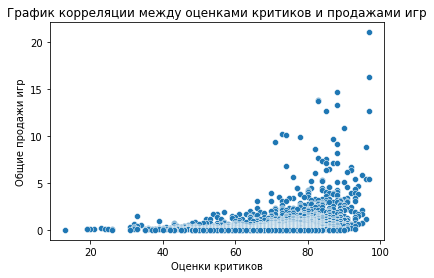

In [38]:
sns.scatterplot(x=sort_years['critic_score'], y=sort_years['all_sales']);
critic_all_corr = sort_years['critic_score'].corr(sort_years['all_sales'])
plt.title('График корреляции между оценками критиков и продажами игр')
plt.xlabel('Оценки критиков')
plt.ylabel('Общие продажи игр')
print(f'Корреляция: {critic_all_corr:.2f}')

Корреляция:0.03


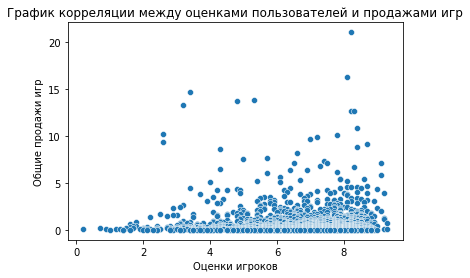

In [39]:
sns.scatterplot(x=sort_years['user_score'], y=sort_years['all_sales']);
user_all_corr = sort_years['user_score'].corr(sort_years['all_sales'])
plt.title('График корреляции между оценками пользователей и продажами игр')
plt.xlabel('Оценки игроков')
plt.ylabel('Общие продажи игр')
print(f'Корреляция:{user_all_corr:.2f}')

##### Вывод
Рассмотрев корреляции оценок (пользователй и критиков) на продажи игр, как на Х360, так и на другие платформы, мы видим, что отзывы пользовтаелей играют менее существенную роль, чем отзывы критиков, но и последние имеют не очень сильное влияние на продажи.

#### Посмотрим на общее распределение игр по жанрам. 
Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Какие жанры представлены:
- Sports (Спортивные) - игры, связанные с различными видами спорта, такими как футбол, баскетбол, теннис и другие.
- Platform (Платформеры) - игры, где основной геймплей связан с передвижением персонажа по платформам и преодолением препятствий.
- Racing (Гонки) - игры, посвященные автогонкам, мотогонкам или другим видам гоночного спорта.
- Role-Playing (Ролевые) - игры, где игрок контролирует персонажа и принимает решения, влияющие на развитие сюжета и ход игры.
- Puzzle (Головоломки) - игры, основанные на решении различных головоломок и головоломок.
- Misc (Разнообразные) - игры, которые не попадают в определенный жанр или имеют комбинацию различных жанров.
- Shooter (Шутеры) - игры, где основной геймплей связан с использованием оружия для уничтожения врагов.
- Simulation (Симуляторы) - игры, имитирующие реальные процессы или ситуации, такие как симуляторы жизни, авиасимуляторы и т. д.
- Action (Экшн) - игры, с активным и динамичным геймплеем, включающие сражения, платформинг и другие действия.
- Fighting (Файтинги) - игры, где игроки управляют бойцами и сражаются друг с другом в рукопашном бою.
- Adventure (Приключения) - игры, где основной упор делается на сюжет и исследование мира, решение головоломок и выполнение заданий.
- Strategy (Стратегии) - игры, где игроку предстоит управлять ресурсами, принимать стратегические решения и вести битвы с другими игроками или компьютерными противниками.

In [40]:
genre_sales = data.groupby('genre')['all_sales'].median().sort_values(ascending=False).reset_index()

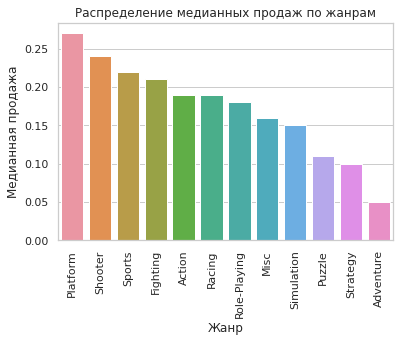

In [41]:
# создаем график, на котором отображаем медианные продажи по жанрам
sns.set(style="whitegrid")
ax = sns.barplot(x=genre_sales['genre'], y='all_sales', data=genre_sales)
ax.set(xlabel='Жанр', ylabel='Медианная продажа', title='Распределение медианных продаж по жанрам')
plt.xticks(rotation=90)
plt.show()

##### Вывод

Самыми прибыльными жанрами являются: Platform, Shooter, Sports, Role-Playing и Racing.

Выделяются жанры с высокими и низкими продажами. Например, жанр Action имеет медианные продажи выше среднего значения, но при этом существенно отстает от лидеров. 

А жанры Adventure и Puzzle имеют медианные продажи значительно ниже среднего значения.
_________
**При этом практически половину (43,8%) объема рынка занимают три жанра: Action 22.6%,  Shooter 11.0%, Role-Playing	10.2%**

#####                                                             
 
                                               ВЫВОД ИССЛЕДОВАТЕЛЬСКОГО АНАЛИЗА

**Исследовав рынок игр за 2011-2016 год, мы можем сделать некоторые выводы.**

Самые успешные и потенциально прибыльные платформы это **PS3, X360, PS4**.Но в этой тройке **лучше всех себя показала Х360.**
______________ 
5 самых популярных жанров игр это **Экшн(Action), Шутеры(Shooter), Ролевые(Role-Playing), Спортивные(Sports) и Разнообразные (Misc).При этом практически половину (49%) объема рынка занимают два жанра: Action 28.5%, Shooter 20.6%**
_______________
По нашим расчетам видно, что **оценки критиков имеют небольшое положительное влияние на продажи игр, а оценки пользователей не влияют.**
                                 

### Составлем портрет пользователя каждого региона

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

____________________
Определите для пользователя каждого региона (NA, EU, JP):
 - Самые популярные платформы (топ-5). Опишите различия в долях продаж.
 - Самые популярные жанры (топ-5). Поясните разницу.
 - Влияет ли рейтинг ESRB на продажи в отдельном регионе?


##### Пользователь из Северной Америки (NA)

Для того чтобы ответить на вопросы, мы будем использовать метод groupby, группируя продажи по региону и платформам, жанрам и рейтингу.

In [42]:
user_na_platform = sort_years.groupby('platform')['na_sales'].sum().sort_values(ascending=False)
user_na_platform.head(5)

platform
X360    226.80
PS3     168.26
PS4     108.74
XOne     93.12
3DS      82.65
Name: na_sales, dtype: float64

**Самые популярные платформы X360, PS3, PS4, XOne, 3DS**

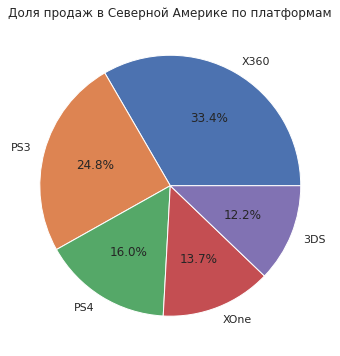

In [43]:
user_na_platform = sort_years.groupby('platform')['na_sales'].sum().sort_values(ascending=False)
na_sales_share = ((user_na_platform.head(5) / user_na_platform.head(5).sum()) * 100).round(2)

plt.figure(figsize=(8, 6))
plt.pie(na_sales_share, labels=na_sales_share.index, autopct='%1.1f%%')
plt.title('Доля продаж в Северной Америке по платформам')
plt.show()

**По круговой диаграмме мы видим, что больше половины продаж в Северной Америке приходится на Х360 и PS3.
Остальную половину делят PS4, XOne, 3DS**

In [44]:
user_na_genre = sort_years.groupby('genre')['na_sales'].sum().sort_values(ascending=False)
top_na_genre = user_na_genre.head(5)
top_na_genre

genre
Action          230.92
Shooter         194.43
Sports          108.70
Role-Playing     83.78
Misc             69.69
Name: na_sales, dtype: float64

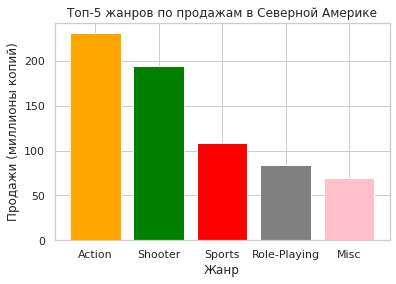

In [45]:
colors = ['orange', 'green', 'red', 'grey', 'pink']
plt.bar(top_na_genre.index, top_na_genre.values, color=colors)
plt.xlabel('Жанр')
plt.ylabel('Продажи (миллионы копий)')
plt.title('Топ-5 жанров по продажам в Северной Америке')
plt.show()

**Топ 5 продаваемых жанров это Action, Shooter, Sports, Role-Playing, Misc** 
Разница между этими жанрами заключается в объеме продаж в регионе NA. Жанры "Action" и "Shooter" являются самыми популярными и приносят наибольшие продажи, за ними следуют "Sports", "Role-Playing" и "Misc".

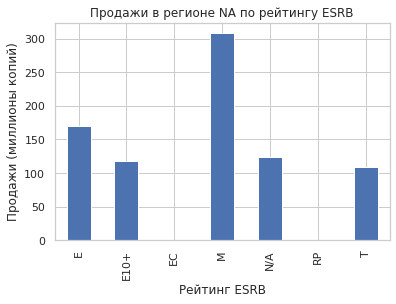

In [46]:
user_na_rating = sort_years.pivot_table(index='rating', values='na_sales', aggfunc='sum')
user_na_rating.plot(kind='bar', y='na_sales', legend=False)
plt.title('Продажи в регионе NA по рейтингу ESRB')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Продажи (миллионы копий)')
plt.show()

Вспомним обозначения рейтинга:

- 'E' Подходит для всех возрастных категорий.
- 'M' Подходит для лиц старше 17 лет.
- 'T' Подходит для лиц старше 13 лет.
- 'E10+' Подходит для лиц старше 10 лет.
- 'AO' Подходит для взрослых старше 18 лет.
- 'EC' Для детей младшего возраста. Подходит для детей от 3 лет
- 'RP' Категория ещё не присвоена.

**Для жителей Северной Америки характерно покупать игры категорий: 'M' Подходит для лиц старше 17 лет, 'E' Подходит для всех возрастных категорий, 'E10+' Подходит для лиц старше 10 лет** 

##### Портрет пользователя из Северной Америки (NA):

- Возраст: Скорее всего старше 17 лет, так как предпочитает игры с рейтингом "M" (для лиц старше 17 лет) или "E10+" (для лиц старше 10 лет).
- Интересы: Предпочтение жанров "Action", "Shooter"
- Платформы: Играет на платформах Xbox 360 (X360), PlayStation 3 (PS3)

##### Пользователь из Европы (EU)

In [47]:
user_eu_platform = sort_years.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)
user_eu_platform.head(5)

platform
PS3     163.10
PS4     141.09
X360    117.10
3DS      61.27
PC       56.70
Name: eu_sales, dtype: float64

**Самые популярные платформы PS3, PS4, X360, 3DS и РС**

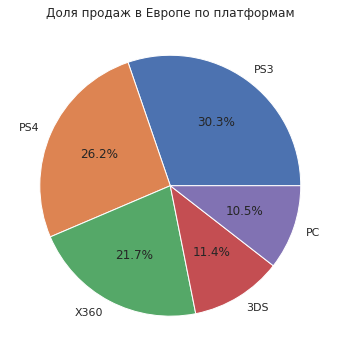

In [48]:
# Рассчет долей продаж для каждой платформы в процентах от суммы продаж в Европе
user_eu_platform = sort_years.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)
eu_sales_share = ((user_eu_platform.head(5) / user_eu_platform.head(5).sum()) * 100).round(2)

plt.figure(figsize=(8, 6))
plt.pie(eu_sales_share, labels=eu_sales_share.index, autopct='%1.1f%%')
plt.title('Доля продаж в Европе по платформам')
plt.show()

**По круговой диаграмме мы видим, что больше половины продаж в Европе приходится на PS4 и PS3. Остальную половину делят X360, 3DS и PC**

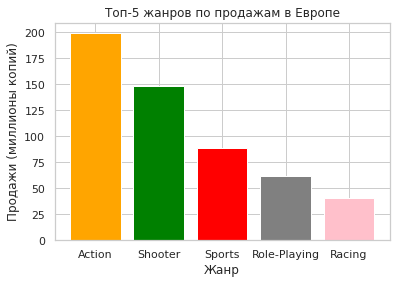

In [49]:
user_eu_genre = sort_years.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)
top_eu_genre = user_eu_genre.head(5)
colors = ['orange', 'green', 'red', 'grey', 'pink']
plt.bar(top_eu_genre.index, top_eu_genre.values, color=colors)
plt.xlabel('Жанр')
plt.ylabel('Продажи (миллионы копий)')
plt.title('Топ-5 жанров по продажам в Европе')
plt.show()

**Топ 5 продаваемых жанров это Action, Shooter, Sports, Role-Playing, Racing** 
Разница между этими жанрами заключается в объеме продаж. Жанры "Action" и "Shooter" являются самыми популярными и приносят наибольшие продажи, за ними следуют "Sports", "Role-Playing" и "Racing".

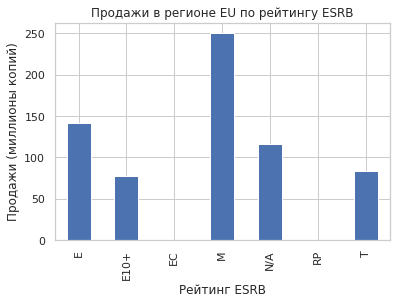

In [50]:
user_eu_rating = sort_years.pivot_table(index='rating', values='eu_sales', aggfunc='sum')
user_eu_rating.plot(kind='bar', y='eu_sales', legend=False)
plt.title('Продажи в регионе EU по рейтингу ESRB')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Продажи (миллионы копий)')
plt.show()

**Для жителей Европы характерно покупать игры категорий: 'M' Подходит для лиц старше 17 лет, 'E' Подходит для всех возрастных категорий** 

##### Портрет пользователя из Европы (EU):

- Возраст: Скорее всего старше 17 лет, так как предпочитает игры с рейтингом "M" (для лиц старше 17 лет) или "E10+" (для лиц старше 10 лет).
- Интересы: Предпочтение жанров "Action", "Shooter"
- Платформы: Играет на платформах  PlayStation 3 (PS3), PlayStation 4 (PS4)

##### Пользователь из Японии (JP)

In [51]:
user_jp_platform = sort_years.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)
user_jp_platform.head(5)

platform
3DS    100.62
PS3     49.39
PSP     24.04
PSV     21.84
PS4     15.96
Name: jp_sales, dtype: float64

**Самые популярные платформы 3DS, PS3, PSP, PSV и РS4**

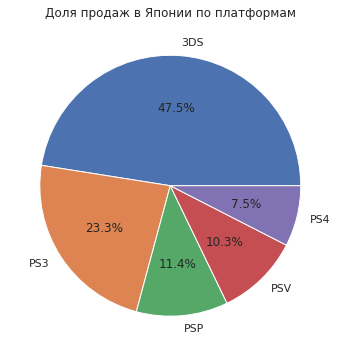

In [52]:
jp_sales_share = ((user_jp_platform.head(5) / user_jp_platform.head(5).sum()) * 100).round(2)

plt.figure(figsize=(8, 6))
plt.pie(jp_sales_share, labels=jp_sales_share.index, autopct='%1.1f%%')
plt.title('Доля продаж в Японии по платформам')
plt.show()

**По круговой диаграмме мы видим, что практически половину рынка занимает 3DS (Nintendo), остальная часть приходится на PS3,   
PSP, PSV, PS4**   

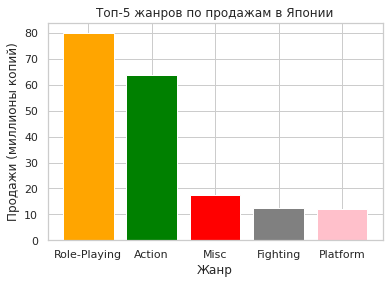

In [53]:
user_jp_genre = sort_years.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)
top_jp_genre = user_jp_genre.head(5)
colors = ['orange', 'green', 'red', 'grey', 'pink']
plt.bar(top_jp_genre.index, top_jp_genre.values, color=colors)
plt.xlabel('Жанр')
plt.ylabel('Продажи (миллионы копий)')
plt.title('Топ-5 жанров по продажам в Японии')
plt.show()

**Топ 5 продаваемых жанров это Role-Playing, Action, Misc, Fighting, Platform** 

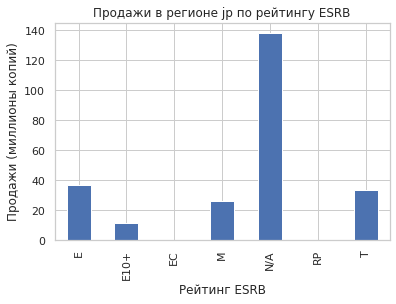

In [54]:
user_jp_rating = sort_years.pivot_table(index='rating', values='jp_sales', aggfunc='sum')
user_jp_rating.plot(kind='bar', y='jp_sales', legend=False)
plt.title('Продажи в регионе jp по рейтингу ESRB')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Продажи (миллионы копий)')
plt.show()

**Для жителей Японии характерно покупать игры категорий: 'E' Подходит для всех возрастных категорий и 
'T' Подходит для лиц старше 13 лет.**

##### Портрет пользователя из Японии (JP):
- Возраст: Скорее всего играют пользователи всех возрастов
- Интересы: Предпочтение жанров  "Role-Playing", "Action"
- Платформы: Играет на платформах Nintendo(3DS) и PlayStation 3 (PS3)

##### Вывод

**Ожидаемо, пользователи Евпропы и Северной Америки очень похожи между собой и сильно отличаются от пользователей из Японии.**
**Скорее всего это связано с тем, что между Японией и другими регионами большие различия в культуре и экономике.
Японский рынок игр ориентирован на местные игры и платформы**


### Проверяем гипотезы

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
___________

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

#### Гипотеза 1

1) Н0(нулевая гипотеза): Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

2) Н1(альтернативная гипотеза): Средние пользовательские рейтинги платформ Xbox One и PC разные.

Для проверки этой гипотезы мы можем использовать t-тест для независимых выборок. Пользовательские рейтинги этих платформ являются независимыми выборками, так как оценки пользователей одной платформы не влияют на другую платформу.

In [55]:
# создадим выборки
xone = sort_years[sort_years['platform'] == 'XOne']
pc = sort_years[sort_years['platform'] == 'PC']

# Удаление строк с пропусками в данных
xone = xone.loc[~xone['user_score'].isna()]
pc = pc.loc[~pc['user_score'].isna()]

In [56]:
# Уровень значимости (alpha)
alpha = 0.05

# Проведение t-теста для гипотезы 1
t_stat, p_value = stats.ttest_ind(xone['user_score'], pc['user_score']) 
print("Значение t-статистики:", t_stat)
print("Значение p-значения:", p_value)

# Сравнение p-значения с уровнем значимости alpha
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: средние значения различаются.")
else:
    print("Не отвергаем нулевую гипотезу: средние значения одинаковые.")

Значение t-статистики: 0.48660071309601444
Значение p-значения: 0.6267602271422398
Не отвергаем нулевую гипотезу: средние значения одинаковые.


##### Вывод
**Нет статистически значимых доказательств, что средние пользовательские рейтинги платформы Xbox One (XOne) и персонального компьютера (PC) различаются. Мы не можем сделать вывод о том, что одна из платформ имеет значительно отличающиеся пользовательские оценки относительно другой.**

#### Гипотеза 2

1) H0 (нулевая гипотеза): Средние пользовательские рейтинги жанров Action и Sports одинаковые.

2) H1 (альтернативная гипотеза): Средние пользовательские рейтинги жанров Action и Sports различаются.

Для проверки этой гипотезы также можем использовать t-тест для независимых выборок, так как сравниваемые выборки (пользовательские рейтинги жанров Action и Sports) являются независимыми.

In [57]:
# создадим выборки
action = sort_years[sort_years['genre'] == 'Action']
sports = sort_years[sort_years['genre'] == 'Sports']

# Удаление строк с пропусками в данных
action = action.loc[~action['user_score'].isna()]
sports = sports.loc[~sports['user_score'].isna()]

In [58]:
# Уровень значимости (alpha)
alpha = 0.05

# Проведение t-теста для гипотезы 2
t_stat, p_value = stats.ttest_ind(action['user_score'], sports['user_score']) 
print("Значение t-статистики:", t_stat)
print("Значение p-значения:", p_value)

# Сравнение p-значения с уровнем значимости alpha
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: средние значения различаются.")
else:
    print("Не отвергаем нулевую гипотезу: средние значения одинаковые.")

Значение t-статистики: 10.399926387716395
Значение p-значения: 5.1974550252152054e-24
Отвергаем нулевую гипотезу: средние значения различаются.


##### Вывод
**Мы можем отвергнуть нулевую гипотезу о их равенстве на выбранном уровне значимости. Это может указывать на то, что данные жанры имеют разные уровни популярности среди пользователей, и есть статистически значимые различия между их средними рейтингами.**

#### 
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

**Да, рейтинги платформ Xbox One и PC одинаковые.**
_________________________
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**Да, рейтинги жанров Action и Sports разные.**

### ОБЩИЙ ВЫВОД РАБОТЫ

В ходе работы были проведены изменения типов данных, предобработка данных (включая приведение названий колонок к нижнему регистру, изменение типа данных колонок "year_of_release" и "user_score", обработку пропущенных значений и создание нового столбца "all_sales"). Эти изменения были осуществлены для облегчения анализа и исправления ошибок в исходных данных.

Рекомендации по сбору и хранению информации для заказчиков:

- Обеспечить точность и полноту данных при их сборе из надежных источников, чтобы избегать искажений в результате анализа.

- Регулярно проводить предобработку данных, включая приведение к единому формату, проверку на наличие пропущенных значений и их обработку, а также коррекцию типов данных, чтобы гарантировать корректность анализа.

- Хранить данные в структурированном виде, таком как база данных или таблицы, с четкими именами колонок и удобными форматами данных, чтобы облегчить дальнейший анализ.

**Исследование рынка игр в Северной Америке, Европе и Японии за период 2011-2016 годов позволило выявить определенные закономерности успешности игр.**

 - Во всех трех регионах наиболее популярные платформы игр - это **Xbox 360 (X360) и PlayStation 3 (PS3)**. 
В Северной Америке и Европе PlayStation 4 (PS4) также является успешной платформой, в то время как в Японии предпочтение отдается Nintendo 3DS и PlayStation 3 (PS3).

- Самые популярные жанры игр во всех трех регионах - это **Action (Экшн) и Shooter (Шутер)**. В Северной Америке и Европе также популярны Sports (Спортивные) и Misc (Разнообразные) игры, а в Японии особенно популярны Role-Playing (Ролевые) игры.

Оценки критиков имеют небольшое положительное влияние на продажи игр, в то время как оценки пользователей не оказывают значительного влияния на успешность игры.

**Таким образом, при планировании рекламных кампаний и разработке игр стоит обратить внимание на популярные платформы и жанры в соответствующих регионах, а также учесть мнение критиков, чтобы создать потенциально успешный продукт на рынке игр.**